In [ ]:
import pandas as pd

In [ ]:
state = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/cross country/5000_M_State_Meet_Times_Updated.csv')

In [ ]:
state

,ID,Name,Year of Graduation,Place,Course,Date,Time,Classification
0,NaN,David Chuli  Serra,2024,1,Apalachee Regional Park,2023-11-17,15:24.3,Senior
1,1.0,David Chuli  Serra,2024,2,Apalachee Regional Park,2022-11-05,15:27.0,Junior
2,2.0,Bert Irigoyen,2012,1,Little Everglades Ranch,2010-11-20,15:42.0,Junior
3,3.0,Bert Irigoyen,2012,1,Little Everglades Ranch,2011-11-19,15:57.0,Senior
4,4.0,Gabriel Correa,2016,3,Apalachee Regional Park,2014-11-15,16:00.0,Junior
...,...,...,...,...,...,...,...,...
137,131.0,Nolan Wu,2024,204,Apalachee Regional Park,2021-11-12,19:35.7,Sophomore
138,132.0,Antoine Esber,2016,180,Apalachee Regional Park,2014-11-15,19:39.7,Junior
139,133.0,Erik Medina,2021,206,Apalachee Regional Park,2019-11-09,19:54.1,Junior
140,134.0,Andres Posada,2006,164,Little Everglades Ranch,2005-11-12,20:25,Senior


In [ ]:
alltime = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/cross country/5000m_All_Time_Updated.csv', encoding='latin1')

In [ ]:
alltime

,Place,Name,Course,Date,Time,Graduation Year,PR Year,School Year
0,1,David Chuli Serra 24,"Spanish River Inv, S County Regional P",09.22.23,15:05.4,2024.0,2023.0,Senior
1,2,Billy Convey 83,"Kinney/Footlocker Regional, McAlpine",1982,15:10.9,1983.0,1982.0,Senior
2,3,Bert Irigoyen 12,"Pre-State, Little Everglades Ranch",10.16.10,15:29.9,2012.0,2010.0,Junior
3,4,Gabriel Correa 16,Holy Trinity Invitational,10.18.14,15:42,2016.0,2014.0,Junior
4,5,Alex Plasencia 05,"Footlocker Regional, McAlpine",11.27.04,15:59,2005.0,2004.0,Senior
...,...,...,...,...,...,...,...,...
287,279,Fernando Arguelles 11,"Palmer Trinity Invitational, Palmer",10.13.07,29:35:00,2011.0,2007.0,Freshman
288,280,Jose Bengochea 09,"Miami Country Day, Greynolds Park",10.16.07,29:59:00,2009.0,2007.0,Junior
289,281,Henry Pfleger 11,"Miami Country Day, Greynolds Park",1016.07,30:01:00,2011.0,NaN,Unknown
290,282,Pablo Prieto 04,Kennedy Park,10.16.03,30:48.8,2004.0,2003.0,Senior


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Training MSE: 1092.2841860679162
Testing MSE: 1263.6263614159334


<ipython-input-14-200d34626dfb>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  alltime['Name'] = alltime['Name'].str.replace(r'\d{2,4}', '').str.strip()


In [ ]:

state['Name'] = state['Name'].str.lower().str.strip()
alltime['Name'] = alltime['Name'].str.lower().str.strip()
alltime['Name'] = alltime['Name'].str.replace(r'\d{2,4}', '').str.strip()
alltime['Extracted Graduation Year'] = alltime['Graduation Year']


<ipython-input-15-fd411c9636a5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  alltime['Name'] = alltime['Name'].str.replace(r'\d{2,4}', '').str.strip()


In [ ]:
merged_data = pd.merge(
    state,
    alltime,
    left_on=['Name', 'Year of Graduation'],
    right_on=['Name', 'Extracted Graduation Year'],
    how='inner'
)


In [ ]:
features = merged_data[['Time_y', 'Classification', 'Course_y']]
target = merged_data['Place_x']


In [ ]:
features_clean = features.dropna()
target_clean = target[features_clean.index]

In [ ]:
def time_to_seconds(time_str):
    try:
        min_sec = time_str.split(':')
        return int(min_sec[0]) * 60 + float(min_sec[1])
    except:
        return np.nan
features_clean['Time_y'] = features_clean['Time_y'].apply(time_to_seconds)

In [ ]:
label_encoder = LabelEncoder()
features_clean['Classification'] = label_encoder.fit_transform(features_clean['Classification'])
features_clean['Course_y'] = label_encoder.fit_transform(features_clean['Course_y'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Training RMSE: {rmse_train}")
print(f"Testing RMSE: {rmse_test}")

Training RMSE: 31.975430679938402
Testing RMSE: 34.15188964380407


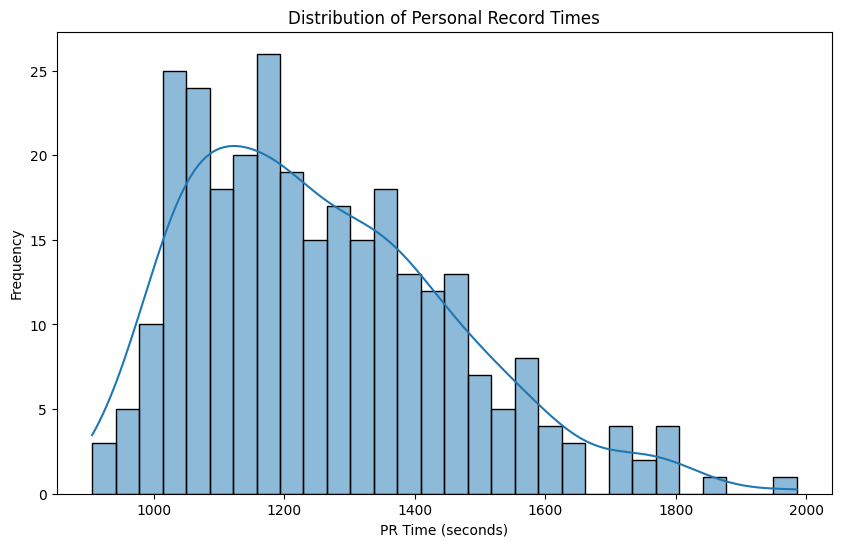

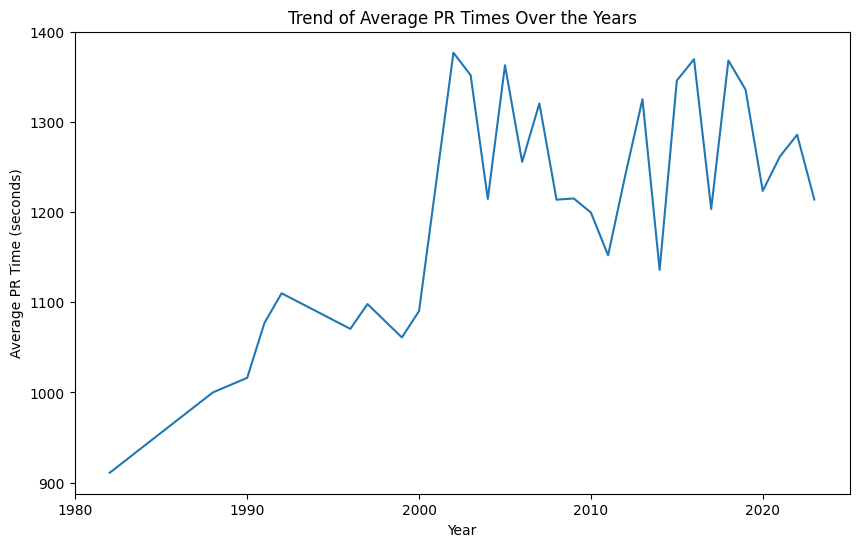

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
alltime['PR Time in Seconds'] = alltime['Time'].apply(time_to_seconds)

# Visualization 1: Distribution of PR Times
plt.figure(figsize=(10, 6))
sns.histplot(alltime['PR Time in Seconds'].dropna(), kde=True, bins=30)
plt.title('Distribution of Personal Record Times')
plt.xlabel('PR Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Performance Over Years
# Converting 'Date' to datetime and extracting the year
alltime['PR Year'] = pd.to_datetime(alltime['Date'], errors='coerce').dt.year

# Aggregating average PR times by year
average_pr_by_year = alltime.groupby('PR Year')['PR Time in Seconds'].mean().reset_index()

# Plotting the trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_pr_by_year, x='PR Year', y='PR Time in Seconds')
plt.title('Trend of Average PR Times Over the Years')
plt.xlabel('Year')
plt.ylabel('Average PR Time (seconds)')
plt.show()



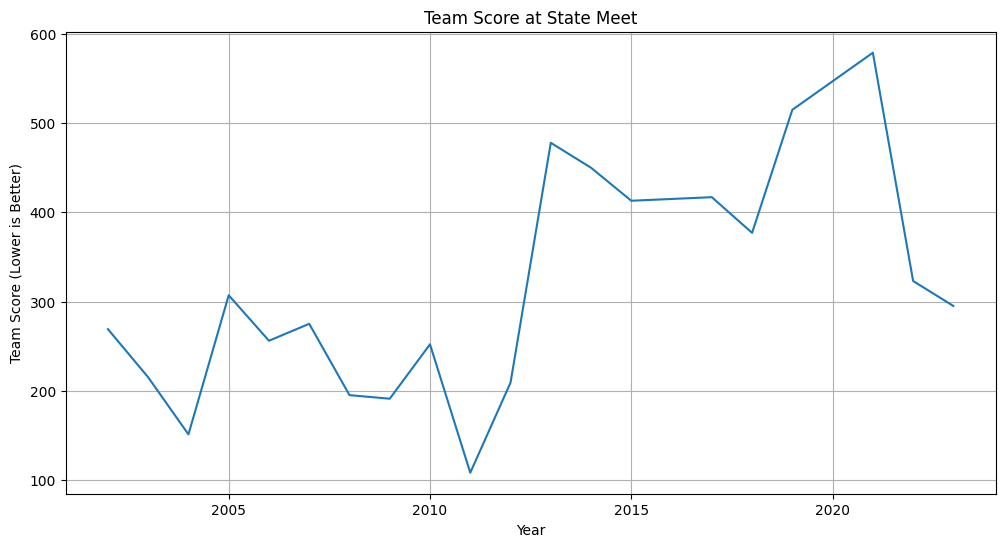

In [ ]:

state['Meet Year'] = pd.to_datetime(state['Date']).dt.year
team_scores_corrected = state.groupby('Meet Year').apply(
    lambda x: x.nsmallest(5, 'Place')['Place'].sum() if len(x) >= 5 else None
).dropna()


team_scores_corrected = team_scores_corrected.reset_index()
team_scores_corrected.columns = ['Year', 'Team Score']


plt.figure(figsize=(12, 6))
sns.lineplot(data=team_scores_corrected, x='Year', y='Team Score')
plt.title('Team Score at State Meet')
plt.xlabel('Year')
plt.ylabel('Team Score (Lower is Better)')
plt.grid(True)
plt.show()

